In [8]:
# from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Flatten
# from keras.models import Model
# from keras.callbacks import EarlyStopping

import scipy.io as sio
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from keras.layers import Dropout, BatchNormalization, Flatten, Dense, Input, Conv1D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Model
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

import csv
split_step = 1
num_sensors = 2

In [9]:

wrist_none_data_raw = np.concatenate((np.genfromtxt ('../EMG_data/ife_wrist_none.csv', delimiter=","), np.genfromtxt ('../EMG_data/ife_wrist_none_0.csv', delimiter=",")), axis=0 )

wrist_none_data = np.zeros( (2, int(wrist_none_data_raw.shape[0]/2), int(1000/split_step) ) )

for i in range(0, wrist_none_data_raw.shape[0]):
    wrist_none_data[i%2][int((i-i%2)/2)] = wrist_none_data_raw[i][0:1000:split_step]

wrist_none_data = wrist_none_data.reshape(wrist_none_data.shape[1],wrist_none_data.shape[0], int(1000/split_step))
# ---------------------------------------------------------------------------------#
clench_data_raw = np.concatenate((np.genfromtxt ('../EMG_data/ife_clench.csv', delimiter=","),np.genfromtxt ('../EMG_data/ife_clench_0.csv', delimiter=",")),axis=0)
clench_data = np.zeros( (2, int(clench_data_raw.shape[0]/2), int(1000/split_step) ) )

for i in range(0, clench_data_raw.shape[0]):
    clench_data[i%2][int((i-i%2)/2)] = clench_data_raw[i][0:1000:split_step]

clench_data = clench_data.reshape(clench_data.shape[1],clench_data.shape[0], int(1000/split_step))
# ---------------------------------------------------------------------------------#
wrist_in_data_raw = np.concatenate((np.genfromtxt ('../EMG_data/ife_wrist_in.csv', delimiter=","),np.genfromtxt ('../EMG_data/ife_wrist_in_0.csv', delimiter=",")),axis=0)
wrist_in_data = np.zeros( (2, int(wrist_in_data_raw.shape[0]/2), int(1000/split_step) ) )


for i in range(0, wrist_in_data_raw.shape[0]):
    wrist_in_data[i%2][int((i-i%2)/2)] = wrist_in_data_raw[i][0:1000:split_step]

wrist_in_data = wrist_in_data.reshape(wrist_in_data.shape[1],wrist_in_data.shape[0], int(1000/split_step))

# ---------------------------------------------------------------------------------#
wrist_out_data_raw = np.concatenate((np.genfromtxt ('../EMG_data/ife_wrist_out.csv', delimiter=","),np.genfromtxt ('../EMG_data/ife_wrist_out_0.csv', delimiter=",")),axis=0)
wrist_out_data = np.zeros( (2, int(wrist_out_data_raw.shape[0]/2), int(1000/split_step) ) )

# print(wrist_out_data_raw.shape, wrist_out_data.shape)

for i in range(0, wrist_out_data_raw.shape[0]):
    wrist_out_data[i%2][int((i-i%2)/2)] = wrist_out_data_raw[i][0:1000:split_step]

wrist_out_data = wrist_out_data.reshape(wrist_out_data.shape[1],wrist_out_data.shape[0], int(1000/split_step))


In [10]:
print(wrist_none_data.shape)
print(clench_data.shape)
print(wrist_in_data.shape)
print(wrist_out_data.shape)


(210, 2, 1000)
(175, 2, 1000)
(184, 2, 1000)
(154, 2, 1000)


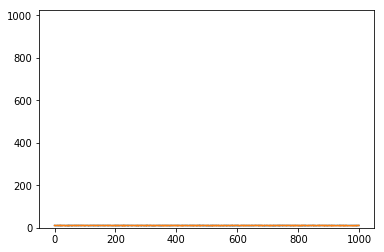

In [70]:
plt.plot(wrist_none_data[20][0])
plt.plot(wrist_none_data[20][1])
plt.ylim(0, 1024)
# plt.show()
plt.savefig('wf/none.png')

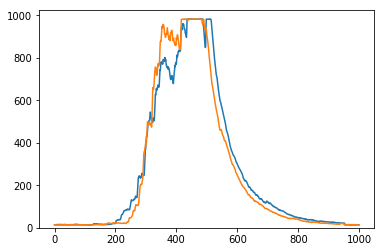

In [71]:
plt.plot(clench_data[7][0])
plt.plot(clench_data[7][1])
plt.ylim(0, 1024)
# plt.show()
plt.savefig('wf/clench.png')

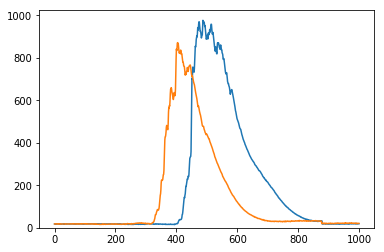

In [72]:
plt.plot(wrist_in_data[52][0])
plt.plot(wrist_in_data[52][1])
plt.ylim(0, 1024)
# plt.show()
plt.savefig('wf/in.png')

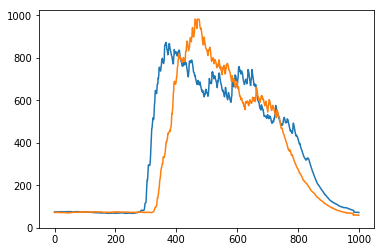

In [73]:
plt.plot(wrist_out_data[80][0])
plt.plot(wrist_out_data[80][1])
plt.ylim(0, 1024)
# plt.show()
plt.savefig('wf/out.png')